In [1]:
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
width = 224
height = 224
batch = 32
data_dir = "./data"


In [3]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, 
    validation_split = 0.3,
    subset = "training",
    seed = 42,
    image_size = (height,width),
    batch_size = batch
    
)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.


In [4]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, 
    validation_split = 0.3,
    subset = "validation",
    seed = 42,
    image_size = (height,width),
    batch_size = batch
    
)

Found 7553 files belonging to 2 classes.
Using 2265 files for validation.


In [5]:
# To see the classes
training_data.class_names

['with_mask', 'without_mask']

In [6]:
classes =  training_data.class_names

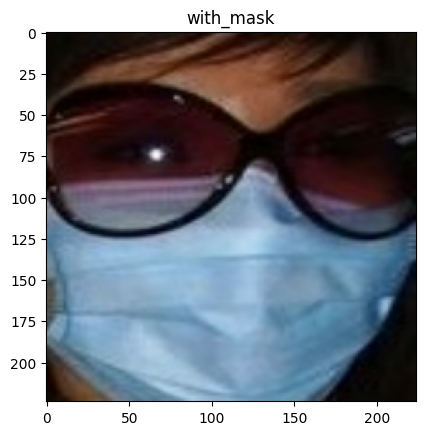

In [7]:
import matplotlib.pyplot as plt
for img, labels in training_data.take(1):
    plt.imshow(img[1].numpy().astype("uint8"))
    plt.title(classes[labels[1]])

In [8]:
from tensorflow.keras.applications import MobileNetV2

In [9]:
model = MobileNetV2(weights = "imagenet")

In [10]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [11]:
model.compile(optimizer = "Adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ["accuracy"])

In [12]:
# Define early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = "val_loss", 
                  patience = 5,
                  verbose= 1,
                  restore_best_weights = True,
                  min_delta = 0.1)

In [13]:
model.fit(training_data,
         validation_data = val_data,
         epochs = 15,
         callbacks = [es])

Epoch 1/15
166/166 [==============================] - 639s 4s/step - loss: 0.1595 - accuracy: 0.9714 - val_loss: 7.8412 - val_accuracy: 0.6684
Epoch 2/15
166/166 [==============================] - 604s 4s/step - loss: 0.0344 - accuracy: 0.9885 - val_loss: 11.5512 - val_accuracy: 0.5726
Epoch 3/15
166/166 [==============================] - 607s 4s/step - loss: 0.0216 - accuracy: 0.9939 - val_loss: 15.1441 - val_accuracy: 0.5298
Epoch 4/15
166/166 [==============================] - 608s 4s/step - loss: 0.0469 - accuracy: 0.9862 - val_loss: 3.7574 - val_accuracy: 0.7342
Epoch 5/15
166/166 [==============================] - 604s 4s/step - loss: 0.0143 - accuracy: 0.9960 - val_loss: 0.3051 - val_accuracy: 0.9647
Epoch 6/15
166/166 [==============================] - 591s 4s/step - loss: 0.0171 - accuracy: 0.9958 - val_loss: 0.2054 - val_accuracy: 0.9669
Epoch 7/15
166/166 [==============================] - 613s 4s/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 22.5357 - val_accuracy: 0.5

In [14]:
model.save("dl-model.save", save_format = "h5")